K MEANS CLUSTERING
--
        
        INTRA CLUSTER DISTANCE
            --> Distance between two observations of two different clusters(groups)
            
        INTER CLUSTER DISTANCE
            --> Distance between two observations within a cluster(group)

---
STEPS TO CREATE A K MEANS ALGORITHM

        STEP_01 : INITIALIZATION

            --> cluster centers (centroids) are created randomly
        
        STEP_02 : ASSIGNMENT

            --> Find the distance between observations and centroids
            --> Assign observations to nearest centroids
        
        STEP_03 : MOVING CLUSTERS
    
            --> Find the mean of all observations within the clusters
            --> Move the centroids to that mean
        
        STEP_04 :
        
            --> Repeat step2 and step3 until there is no change in cluster membership of an observation
            
---
 * CHALLENGES
    
        1) What if no points are allocated to a cluster centroid(s)?
            --> Eliminate centroid and reinitialize the centroid(s) randomly.
        
        2) Cluster centroid initialization
            --> Randomly initialize clusters
            --> cetroids are less than < total number of observations
            
        3) Finding K Value
            --> Elbow method
                Calcualate performance of model by different k values
                select the k value where the model performance is high
            --> Based on the business problem

---
 
 * ASSUMPTIONS
         
         * Clusters should be convex (circle or spherical)
         * All features should be on same scale (scaling)
         * Clusters (groups) should be balanced (Equal number of observations in every group)
         
---

* MODEL EVALUATION

        DISTORTION
        
            --> Distortion means sum of sqaures of distance between centroid and each member(observation)
            --> Lower the value better the model
            
        SILHOUETTE SCORE
        
            --> Silhouette_score is to check quality of cluster - closer to +1 better the model
            --> Ranges from -1 to 1
            --> close to -1 = Wrong assignment of observations to clusters
            --> Close to 0 = cluster boundries are close together
            --> Close to +1 = well classified and clusters are far way from each other
            
        CALINSKI_HARABASZ
        
            --> calinski_harabasz = ratio of within to between cluster dispersion
            --> Variance ratio
            --> Higher the value better the model

In [1]:
# Import crucial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from sklearn
from sklearn.datasets import make_blobs

In [3]:
features, labels = make_blobs(n_samples=20000, n_features=10, center_box=(-1000, 1000),
                              centers=3, cluster_std=1.0, random_state=1)
# n_samples = Number of observations or rows
# n_features = Number of columns or features
# center_box = Range of observation (Selects random value between that range)
# Centres  = Number of centroids ( = Number of clusters)
# cluster_std = Standard Deviation of cluster(default=1.0)

In [4]:
features
# Features or columns in data

array([[ -165.84595658,   441.99438177, -1000.06487276, ...,
         -309.29354766,  -205.89355699,    78.28730656],
       [  601.2125702 ,   935.6485228 ,  -373.17489525, ...,
         -921.69857341,  -661.02128804,   755.22265246],
       [ -164.98819624,   441.42475478, -1001.2941784 , ...,
         -309.17417979,  -205.1519427 ,    78.67681748],
       ...,
       [ -162.89370946,   371.93870931,  -589.77581626, ...,
          118.13532054,  -720.11169273,  -602.93297343],
       [ -167.89080157,   439.92380505,  -997.78950886, ...,
         -311.33554109,  -206.83369637,    78.47911671],
       [ -160.95769663,   370.69665556,  -590.10802211, ...,
          118.68060902,  -718.32321075,  -604.87289577]])

In [5]:
# Features as data frame object
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9
0,-165.845957,441.994382,-1000.064873,-393.575523,-706.598578,-816.136480,-626.851253,-309.293548,-205.893557,78.287307
1,601.212570,935.648523,-373.174895,385.277546,751.794842,786.747213,-830.322848,-921.698573,-661.021288,755.222652
2,-164.988196,441.424755,-1001.294178,-394.661963,-707.002281,-813.960923,-626.746962,-309.174180,-205.151943,78.676817
3,-166.283429,441.200955,-999.302866,-394.421182,-705.796259,-814.696744,-628.459135,-308.889427,-205.909179,77.032922
4,-162.611838,371.588820,-591.995994,754.667458,-945.263202,341.266606,-163.796147,119.725438,-719.177785,-602.954478
...,...,...,...,...,...,...,...,...,...,...
19995,600.880364,937.184895,-373.248888,385.246497,751.730516,789.543120,-828.875142,-920.509126,-659.425674,756.490780
19996,-161.998379,371.308632,-591.050326,756.387380,-945.535694,340.130415,-163.846828,118.473994,-719.346223,-603.084255
19997,-162.893709,371.938709,-589.775816,756.128674,-945.913398,340.722689,-165.641598,118.135321,-720.111693,-602.932973
19998,-167.890802,439.923805,-997.789509,-394.331572,-707.106152,-815.154585,-627.945430,-311.335541,-206.833696,78.479117


In [6]:
labels
# Labels to particular record or row

array([0, 2, 0, ..., 1, 0, 1])

In [7]:
# Pre processing
# Feature scaling --> convert all features into same scale
# Scaling features by using StandardScaler. It converts every column as mean=0 and standard deviation=1
# Xscaled = (Xi-mean)/standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
scaled_features
# All features in same scale

array([[-0.71274124, -0.5577458 , -1.32975274, ...,  0.14488643,
         1.40878454,  0.00290461],
       [ 1.41349009,  1.40171218,  1.08384088, ..., -1.2908014 ,
        -0.57773943,  1.22208363],
       [-0.71036359, -0.56000682, -1.3344857 , ...,  0.14516627,
         1.41202151,  0.00360613],
       ...,
       [-0.70455782, -0.8358173 ,  0.24990411, ...,  1.14692658,
        -0.83565495, -1.22399169],
       [-0.7184094 , -0.56596453, -1.32099235, ...,  0.14009929,
         1.40468106,  0.00325007],
       [-0.69919133, -0.84074738,  0.24862508, ...,  1.14820492,
        -0.82784865, -1.22748554]])

In [9]:
# Model initialization
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=1)

In [10]:
# Train the model on data
k_means.fit(scaled_features)

KMeans(n_clusters=3, random_state=1)

In [11]:
# Model Evaluation
k_means.inertia_ 
# Sum of sqaures of distance between centroid and each member in the cluster (sum of sqaured error)
# Inertia low - High quality cluster

1.7402006470255116

In [12]:
k_means.cluster_centers_
# Cluster centres (centroids) of every feature

array([[ 1.41429724,  1.40512623,  1.08392591,  0.28370735,  1.40233962,
         1.01232899, -1.03913856, -1.29125413, -0.57471496,  1.22399258],
       [-0.70103877, -0.8417883 ,  0.2448251 ,  1.05798558, -0.86012431,
         0.34917043,  1.35028061,  1.14519417, -0.83171325, -1.22552207],
       [-0.71304633, -0.56312717, -1.32858843, -1.34165037, -0.54200497,
        -1.36134759, -0.31129792,  0.14586629,  1.40634201,  0.00171308]])

In [13]:
k_means.n_iter_
# Number of iterations happend to devided as 3 clusters

2

In [14]:
k_means.n_clusters
# Number of clusters or groups

3

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# Silhouette_score is to check quality of cluster - closer to +1 better the model
# Ranges from -1 to 1
# close to -1 = Wrong assignment of observations to clusters
# Close to 0 = cluster boundries are close together
# Close to +1 = well classified and clusters are far way from each other
score = silhouette_score(scaled_features, labels)
print('silhouette_score --> ', score)

silhouette_score -->  0.9974465653616232


In [16]:
calinski_harabasz_score = calinski_harabasz_score(scaled_features, labels)
print('calinski_harabasz_score -->', calinski_harabasz_score)

calinski_harabasz_score --> 1149110364.9581127


In [17]:
# Changing inti = k-means++ to random
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=1)
k_means.fit(scaled_features)
score = silhouette_score(scaled_features, labels)
score

0.9974465653616232

In [18]:
# Choosing best k-value by elbow method based on sse(manually)
sse = []
# Sum of the squared error = Distance between centroid and each member in the cluster
for k in range(2, 10):
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    k_means.fit(scaled_features)
    sse.append(k_means.inertia_)

In [19]:
sse
# Sum of sqaured error for each iteration of k value

[72049.50134701142,
 1.7402006470255127,
 1.660356535071269,
 1.588656743715288,
 1.516341087175283,
 1.4759281905474637,
 1.4213424751306,
 1.375582116993407]

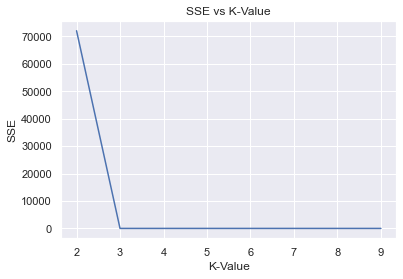

In [20]:
# visualizing sse vs k value (manually)
sns.set_theme() # Back ground
plt.plot(range(2, 10), sse)
plt.title('SSE vs K-Value') #Graph title
plt.xlabel('K-Value')# Labeling x axis
plt.ylabel('SSE')#Labelling y axis
plt.show()

In [21]:
# Choosing best k-value by elbow method based on silhouette score(manually)
silhouette_scores = []

for k in range(2, 10):
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    k_means.fit(scaled_features)
    score = silhouette_score(scaled_features, k_means.labels_)
    silhouette_scores.append(score)

In [22]:
silhouette_scores

[0.7335011588069297,
 0.9974465653616232,
 0.7073846144035544,
 0.4152998341519746,
 0.12367440658280225,
 0.11605346485952923,
 0.11374525527492979,
 0.1098919882250407]

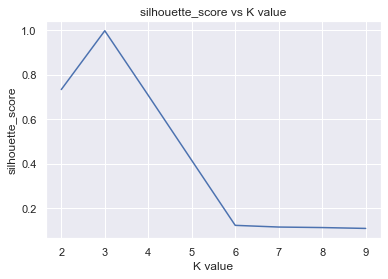

In [23]:
plt.plot(range(2, 10), silhouette_scores)
plt.title('silhouette_score vs K value')
plt.xlabel('K value')
plt.ylabel('silhouette_score')
plt.show()

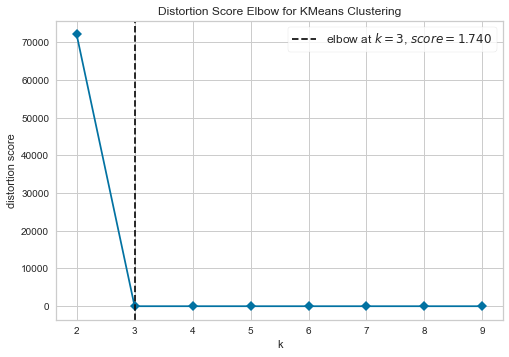

In [24]:
# Visualize sse vs k-value by yellowbrick
# Install yellowbrick (!pip install yellowbrick)

k_means = KMeans(init='k-means++', n_init=10, max_iter=300, random_state=1)

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_means, k = (2, 10), timings=False, metric='distortion')

# distortion means sum of sqaures of distance between centroid and each member
# Lower the value better the model

visualizer.fit(scaled_features)
visualizer.show()
plt.show()

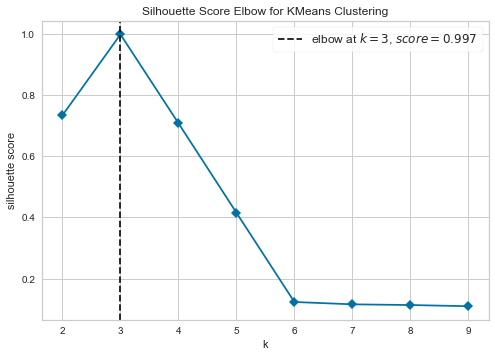

In [25]:
k_means = KMeans(init='k-means++', n_init=10, max_iter=300, random_state=1)

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_means, k = (2, 10), timings=False, metric='silhouette')

# silhouette = mean ratio of intra-cluster and nearest-cluster distance
# closer to 1 better the model

visualizer.fit(scaled_features)
visualizer.show()
plt.show()

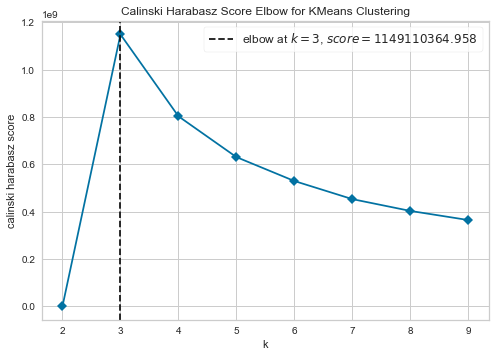

In [26]:
k_means = KMeans(init='k-means++', n_init=10, max_iter=300, random_state=1)

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_means, k = (2, 10), timings=False, metric='calinski_harabasz', locate_elbow=True)

# calinski_harabasz = ratio of within to between cluster dispersion
# Variance ratio
# Higher the value better the model

visualizer.fit(scaled_features)
visualizer.show()
plt.show()

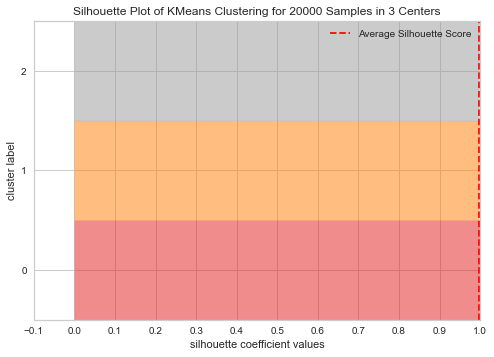

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
# Initiating the model
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=1)
#Initiating the visualizer
visualizer = SilhouetteVisualizer(k_means)
#Fit the data to visualizer
visualizer.fit(scaled_features)
visualizer.show()
plt.show()

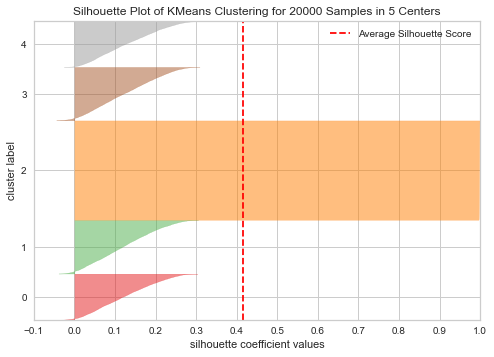

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer
# Initiating the model
k_means = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=1)
#Initiating the visualizer
visualizer = SilhouetteVisualizer(k_means)
#Fit the data to visualizer
visualizer.fit(scaled_features)
visualizer.show()
plt.show()

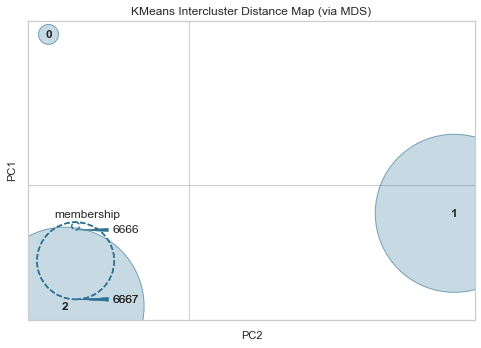

In [29]:
from yellowbrick.cluster import InterclusterDistance
#InterclusterDistance is the distance between two observations of two different clusters

k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=1)

visualizer = InterclusterDistance(k_means)
visualizer.fit(scaled_features)
visualizer.show()
plt.show()

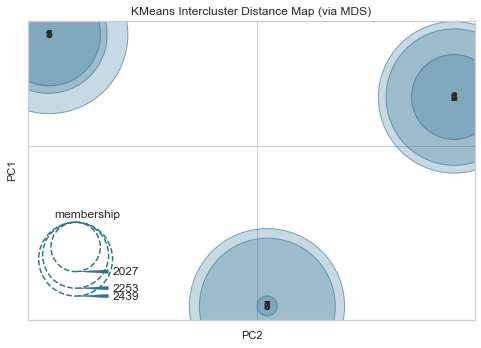

In [30]:
from yellowbrick.cluster import InterclusterDistance

k_means = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300, random_state=1)
visualizer = InterclusterDistance(k_means)
visualizer.fit(scaled_features)
visualizer.show()
plt.show()

In [31]:
# Finalize model with best k value
final_model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=1)
final_model.fit(scaled_features)

KMeans(n_clusters=3, random_state=1)

In [32]:
# Distortion
final_model.inertia_

1.7402006470255118

In [33]:
# Centroid of each feature or column(s)
final_model.cluster_centers_

array([[ 1.41429724,  1.40512623,  1.08392591,  0.28370735,  1.40233962,
         1.01232899, -1.03913856, -1.29125413, -0.57471496,  1.22399258],
       [-0.70103877, -0.8417883 ,  0.2448251 ,  1.05798558, -0.86012431,
         0.34917043,  1.35028061,  1.14519417, -0.83171325, -1.22552207],
       [-0.71304633, -0.56312717, -1.32858843, -1.34165037, -0.54200497,
        -1.36134759, -0.31129792,  0.14586629,  1.40634201,  0.00171308]])

In [34]:
# Final parameters
final_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [42]:
# Evaluation
#silhouette_score
from sklearn.metrics import silhouette_score
final_silhouette_score = silhouette_score(scaled_features, labels)
print('silhouette_score --> ', final_silhouette_score)

silhouette_score -->  0.9974465653616232


In [43]:
from sklearn.metrics import calinski_harabasz_score
final_calinski_harabasz_score = calinski_harabasz_score(scaled_features, labels)
print('calinski_harabasz_score --> ', final_calinski_harabasz_score)

calinski_harabasz_score -->  1149110364.9581127
